## **Import Necessary Libraries**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score,ConfusionMatrixDisplay
print("Libraries Imported")

Libraries Imported


## **Read Data**

In [3]:
name_column=['id','entity','target','Tweet content']
df=pd.read_csv('twitter_training.csv',names=name_column)
df

,id,entity,target,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             74682 non-null  int64 
 1   entity         74682 non-null  object
 2   target         74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## **Explore & cleaning**

In [5]:
df=df.drop(columns=['id','entity'],axis=1)
df

,target,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [6]:
df.isna().sum()

target             0
Tweet content    686
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
count=df['target'].value_counts()
count

target
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

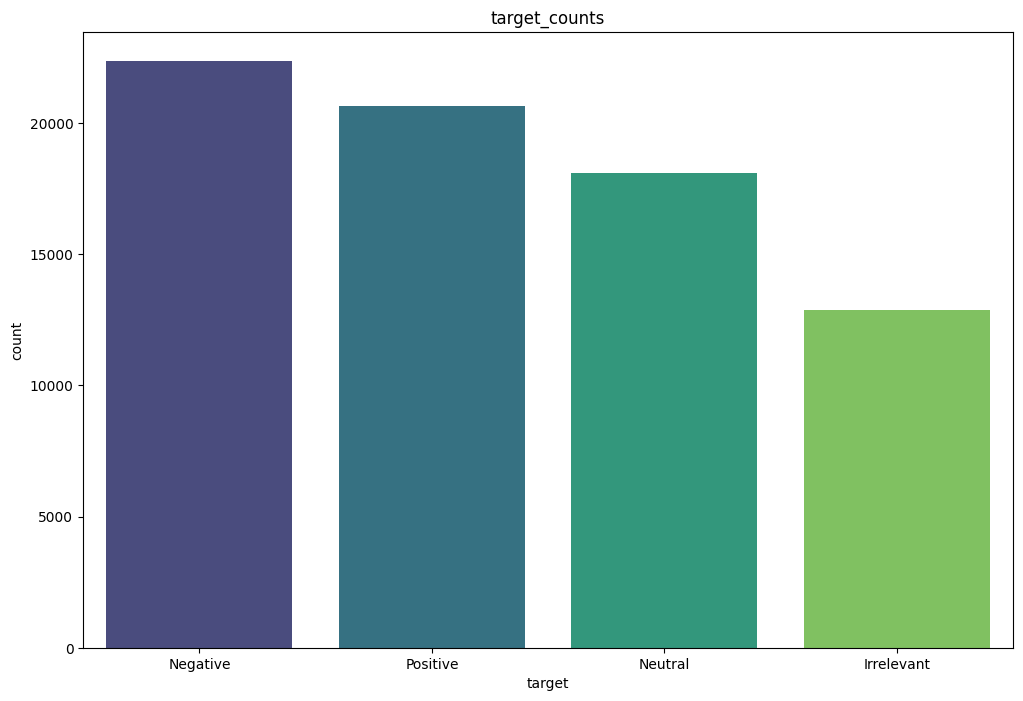

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(x=count.index, y=count.values, hue=count.index, palette='viridis', legend=False)
plt.title('target_counts')
plt.xlabel('target')
plt.ylabel('count')
plt.show()

## **preprocessing**

In [13]:
import nltk
nltk.download('stopwords')


ps=PorterStemmer()
stops=set(stopwords.words('english'))
def preprocessing_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '',text)
    text=text.lower()
    token=text.split()
    token=[ps.stem(word) for word in token if word not in stops]
    return ' '.join(token)

[nltk_data] Downloading package stopwords to C:\Users\Syed
[nltk_data]     Nabeel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['Tweet content']=df['Tweet content'].apply(preprocessing_text)
df['Tweet content']

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: Tweet content, Length: 73996, dtype: object

## feature Extraction

In [15]:
tf=TfidfVectorizer(max_features=5000)
x=tf.fit_transform(df['Tweet content'])
y=df['target']

In [16]:
x.shape

(73996, 5000)

In [17]:
y.shape

(73996,)

## **split data**

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

## **Build models**


--- Naive Bayes ---

Accuracy: 0.6324324324324324

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.74      0.34      0.47      2696
    Negative       0.61      0.81      0.70      4380
     Neutral       0.67      0.51      0.58      3605
    Positive       0.61      0.74      0.67      4119

    accuracy                           0.63     14800
   macro avg       0.66      0.60      0.60     14800
weighted avg       0.65      0.63      0.62     14800


Confusion Matrix:
 [[ 924  728  300  744]
 [  78 3532  309  461]
 [ 147  836 1843  779]
 [  97  652  309 3061]]

--- Decision tree ---

Accuracy: 0.7727027027027027

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.77      0.68      0.73      2696
    Negative       0.82      0.81      0.81      4380
     Neutral       0.71      0.79      0.74      3605
    Positive       0.79      0.78      0.78      4119

    accuracy              

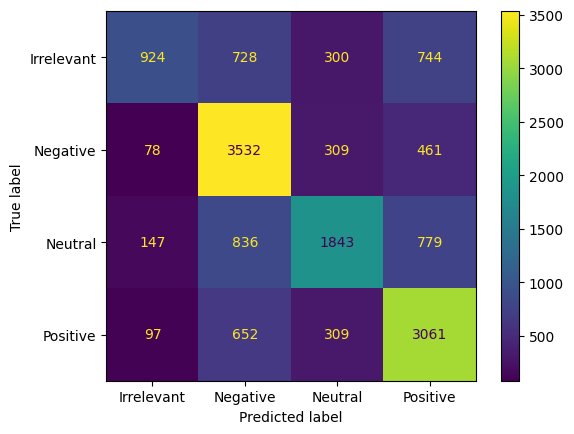

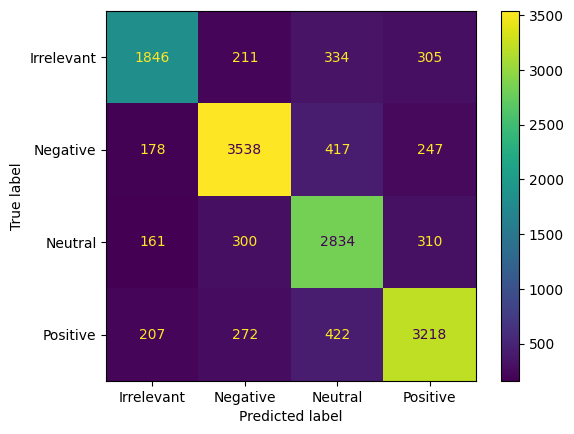

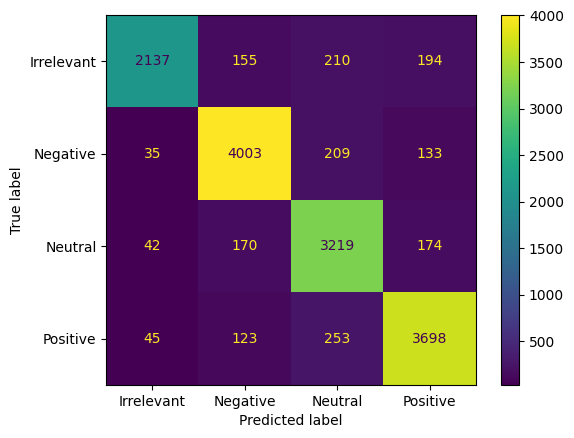

In [19]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)